### Bonus. Leveling Up in NumPy

There are two **extremely** useful features in NumPy that you shouldn't miss out - [Fancy Indexing](https://numpy.org/doc/2.2/user/basics.indexing.html#advanced-indexing) and [Broadcasting](https://numpy.org/doc/2.2/user/basics.broadcasting.html).

In past semesters, students only realized that these features exist after recess week, which is already too late. So let's practise them early on in the semester!

**Your task**: There are 2 independent tasks below, one on fancy indexing and the other on broadcasting. Complete them in any order.

**Submission:** Send me your implementation before / during the tutorial (for bonus EXP)!

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#### Task 1: Fancy Indexing

In general, when we try to access NumPy arrays, we specify either an index or a range. However, NumPy allows us to specify an array of indices or booleans as well!

Specifying an array of indices is intuitive - we give NumPy a list of indices that we would like to select. For example:

```python
import numpy as np
x = np.arange(10, 1, -1)
print(x)
print(x[[1, 4, 7, 7]])
x[[2, 3, 5]] += 1
print(x)
```

Since `x[1]`, `x[4]`, `x[7]` and `x[7]` are `9`, `6`, `3`, `3` respectively, `x[[1, 4, 7, 7]]` will simply return an array of four elements: `[9, 6, 3, 3]`. We can also update elements specified in the array of indices.

Specifying a boolean array is similar - instead of specifying which indices to select, we tell NumPy whether we select each element. For example:

```python
import numpy as np
x = np.array([1, -1, -2, 3])
x[x < 0] += 20
print(x)
```

In this example, `x < 0` gives a boolean array of length 4, so the fancy index `x < 0` will select all elements in `x` that is less than `0`.

**Question** (try out on your own, not for submission): How does fancy indexing work for multi-dimensional arrays?

**Task**: You are given a grayscale image (a two-dimensional NumPy array of size $183 \times 275$, whose elements are between $0 \sim 255$). You would like to apply a **permutation cipher** on the image, i.e. given a permutation `perm` of size 256, you would like to map the color `0` to `perm[0]`, `1` to `perm[1]`, etc. Complete the functions `encrypt` and `decrypt` to encrypt and decrypt the given image **without using any iteration**.

*Instructions*: Download the image [`best_campus_life.bmp`](https://www.comp.nus.edu.sg/~mtyeung/cs2109s_2420/best_campus_life.bmp) and save it in the same folder as your Jupyter notebook file.


In [ ]:
def encrypt(image, perm):
    # TODO: Implement this function.
    return image

def decrypt(image, perm):
    # TODO: Implement this function.
    return image

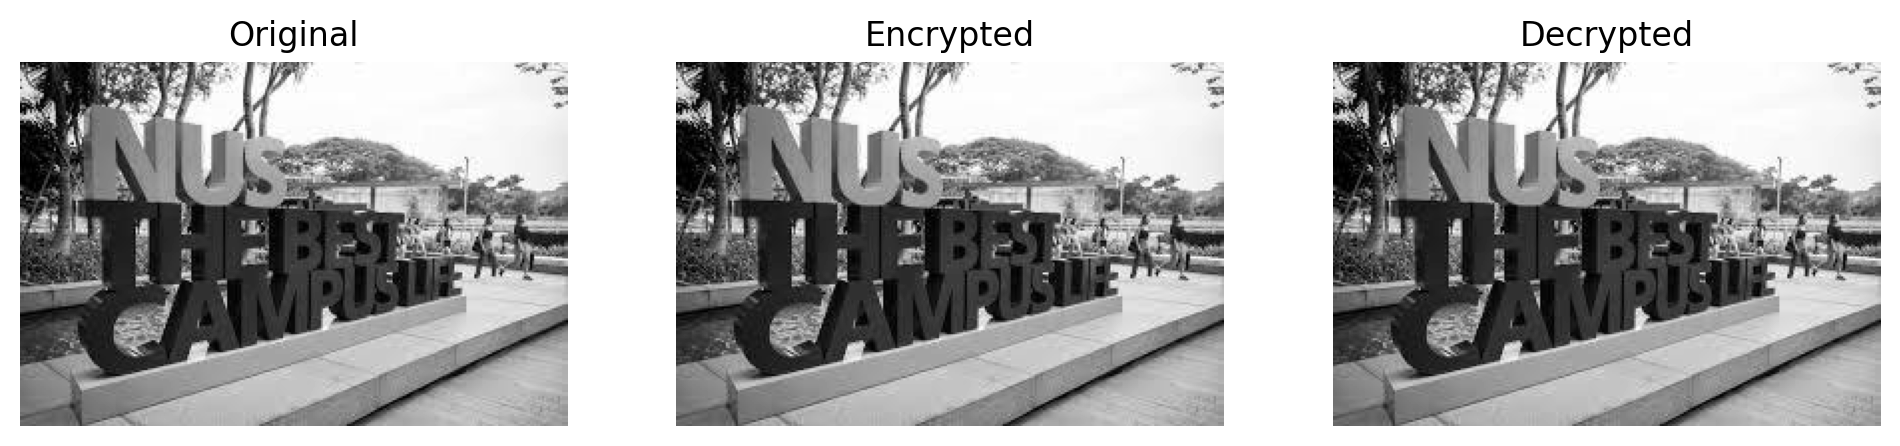

In [ ]:
image = Image.open("best_campus_life.bmp")
image = np.array(image)

plt.subplot(1, 3, 1, title="Original")
plt.imshow(image, cmap="gray")
plt.axis("off")

np.random.seed(2109)
perm = np.random.permutation(256).astype(np.uint8)
encrypted = encrypt(image.copy(), perm.copy())

plt.subplot(1, 3, 2, title="Encrypted")
plt.imshow(encrypted, cmap="gray")
plt.axis("off")

decrypted = decrypt(encrypted.copy(), perm.copy())

plt.subplot(1, 3, 3, title="Decrypted")
plt.imshow(decrypted, cmap="gray")
plt.axis("off")

plt.show()

In [ ]:
# Automatic test case. Make sure you passed this.
image = Image.open("best_campus_life.bmp")
image = np.array(image)

np.random.seed(2109)
perm = np.random.permutation(256).astype(np.uint8)
encrypted = encrypt(image.copy(), perm.copy())

encrypted_correct = image.copy()
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        encrypted_correct[i, j] = perm[encrypted_correct[i, j]]

assert np.all(encrypted_correct == encrypted), \
         "Encrypted image is different from expected"

decrypted = decrypt(encrypted.copy(), perm.copy())

assert np.all(image == decrypted), \
         "Decrypted image is different from expected"

print("Test case passed!")

AssertionError: Encrypted image is different from expected

#### Task 2: Broadcasting

Functions or operators like `+`, `np.maximum` accept more than one argument. Normally, we would assume the arrays will have the same shapes. However, they sometimes work when the shapes are different!

This feature is called **broadcasting**. Subject to certain constraints, the smaller array is “broadcasted” across the larger array so that they have compatible shapes. The internal implementation of NumPy does this without making needless copies of data and usually leads to efficient algorithm implementations.

Let's look at this simple example:

```python
import numpy as np
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b
```

The `*` (element-wise multiplication) operator would expect the two arguments to have the same shape. However, NumPy is smart enough that it implicitly “stretches” the scalar value to match the shape of the larger array.

![](https://cocalc.com/blobs/broadcasting_1.png?uuid=33a72f3b-ff08-4edd-a72a-687d397df9c5)

This can be generalized to higher-dimensional arrays as well. For example,

```python
import numpy as np
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
a + b
```

`a` is of shape `(4, 3)` and `b` is of shape `(3,)`. The dimensions of the two arrays are **right-aligned** and then compared. The last dimension (3) matches, but `b` does not contain the second last dimension. Therefore, `b` is “stretched” to be added to each row of `a`.

![](https://cocalc.com/blobs/broadcasting_2.png?uuid=34301d5a-3ec8-4acd-b786-afd185d9833a)

The following shows an example of dimension mismatch:

```python
import numpy as np
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0, 4.0])
a + b
```

This time, `b` is of shape `(4,)`, which does not match the last dimension of `a`.

![](https://cocalc.com/blobs/broadcasting_3.png?uuid=1c56a69a-6e36-41d6-a19e-6e7028b4d82f)

The broadcasting rules can be summarized as follows: **Right-align** the dimensions and compare each of them. For each dimension, the two sizes are compatible when they are equal, or one of them are 1.

**Question** (to check your understanding):
1. Given two arrays `a` of shape `(3, 1, 5)` and `b` of shape `(4, 1)`, what will be the shape of `a + b`?
2. Given two arrays `a` of shape `(2, 3)` and `b` of shape `(2,)`, what will be the shape of `a * b`?

**Answer**:
1. The shape will be `(3, 4, 5)`.
2. The dimensions are incompatible, so an error will be raised.

**Task**: You are given $N$ points on the 2D coordinate plane. This is given by a $N \times 2$ array `points`, with the $i$-th entry containing the $x$- and $y$-coordinates of the $i$-th point. Complete the function `farthest_pair` that finds the **farthest pair of points** based on **Euclidean distance**, where the (squared) distance of the points between $(X_1, Y_1)$ and $(X_2, Y_2)$ are denoted by:

$$(X_1 - X_2)^2 + (Y_1 - Y_2)^2$$

The function should return the pair of indices $(i, j)$. If there are multiple pairs of such points, return any of them. Once again, your implementation **should not involve any iteration**.

*Hint 1*: An $O(N^2)$ algorithm is acceptable. How can you compute the distances between all pairs of points (using broadcasting)?

*Hint 2*: `np.reshape` is your best friend!


In [7]:
def farthest_pair(points):
    return (0, 1)

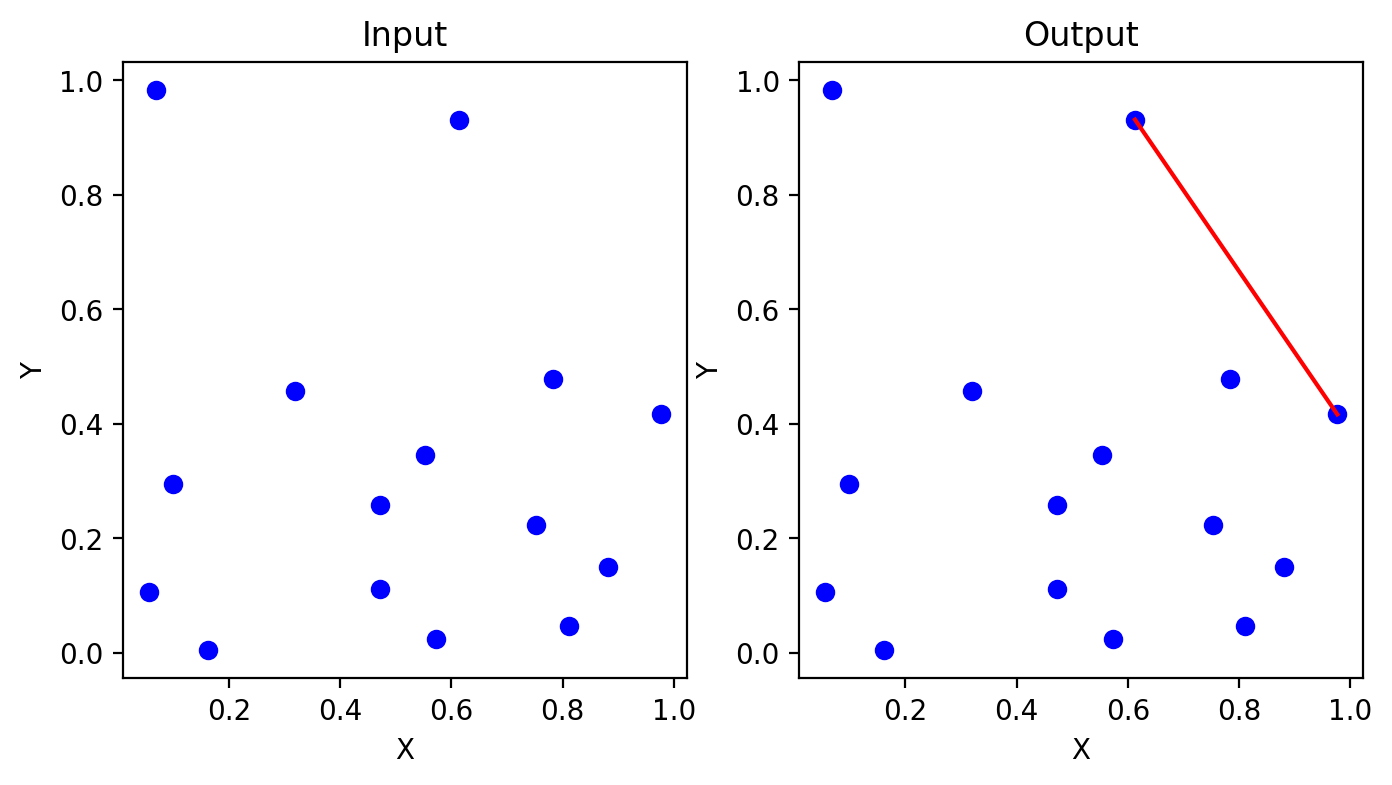

In [8]:
# Sample test case
N = 15
np.random.seed(2109)
points = np.random.rand(N, 2)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1, title='Input')
plt.scatter(points[:, 0], points[:, 1], c='blue')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2, title='Output')
plt.scatter(points[:, 0], points[:, 1], c='blue')

i, j = farthest_pair(points.copy())
plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [9]:
# Automatic test case. Make sure you passed this.
N = 50
np.random.seed(2109)
points = np.random.rand(N, 2)

for t in range(10):
    points = np.random.rand(N, 2)
    i, j = farthest_pair(points.copy())
    dist = (points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2

    for k in range(N):
        for l in range(N):
            assert (points[k][0] - points[l][0]) ** 2 + (points[k][1] - points[l][1]) ** 2 <= dist + 1e-6, \
                "Some pairs of points are farther than your output"

print("Test case passed!")

AssertionError: Some pairs of points are farther than your output

#### Appendix: Why do we "ban" iteration?

NumPy has an optimized backend written in C that can perform operations on entire arrays at once. We call this *vectorization*. When you use Python loops (e.g. `for` loops) to iterate over elements of a NumPy array, you are essentially losing the benefits of vectorization, as each iteration involves overhead from the Python interpreter.

Good use of these features (fancy indexing and broadcasting) often leads to more "Pythonic" code, which is usually more concise and eaiser to read!